In [0]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [0]:
# Load dataset
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("Input data: ", x_train.shape)
print("Output data: ", y_train.shape)

Input data:  (50000, 32, 32, 3)
Output data:  (50000,)


In [0]:
# Create model
i = Input(shape=(32, 32, 3,))
x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
o = Dense(10, activation="softmax")(x)

model = Model(i, o)

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        3692

In [0]:
def train():
    return model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

In [0]:
def train_dataP():
    batch_size = 32
    data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip=True)
    train_generator = data_generator.flow(x_train, y_train, batch_size)
    steps_per_epoch = x_train.shape[0] // batch_size
    return model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)

In [0]:
#r = train()
r = train_dataP()

Epoch 1/20
1562/1562 [==============================] - 24s 15ms/step - loss: 1.6038 - accuracy: 0.4322 - val_loss: 1.3301 - val_accuracy: 0.5299
Epoch 2/20
1562/1562 [==============================] - 23s 15ms/step - loss: 1.2506 - accuracy: 0.5551 - val_loss: 1.0316 - val_accuracy: 0.6321
Epoch 3/20
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0887 - accuracy: 0.6174 - val_loss: 0.9265 - val_accuracy: 0.6790
Epoch 4/20
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0001 - accuracy: 0.6504 - val_loss: 0.9326 - val_accuracy: 0.6813
Epoch 5/20
1562/1562 [==============================] - 23s 15ms/step - loss: 0.9395 - accuracy: 0.6718 - val_loss: 0.7828 - val_accuracy: 0.7246
Epoch 6/20
1562/1562 [==============================] - 23s 15ms/step - loss: 0.8792 - accuracy: 0.6955 - val_loss: 0.7670 - val_accuracy: 0.7379
Epoch 7/20
1562/1562 [==============================] - 23s 15ms/step - loss: 0.8326 - accuracy: 0.7114 - val_loss: 0.8714 -

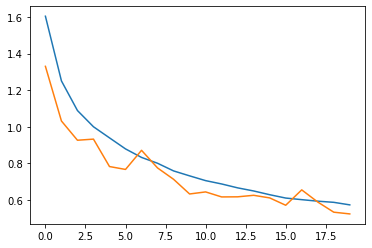

In [0]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")

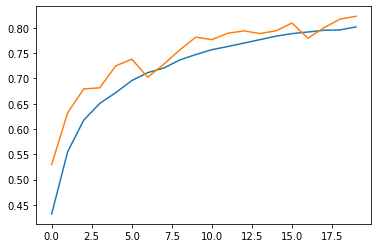

In [0]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")

Confusion matrix, without normalization
[[850  15  22  18  10   8  13  13  18  33]
 [  6 933   0   2   1   2   5   1   5  45]
 [ 44   2 656  33  62  81  83  32   1   6]
 [ 12   6  15 602  35 188  84  40   3  15]
 [ 10   1  30  37 778  26  69  47   2   0]
 [  5   0   9  74  25 830  19  36   0   2]
 [  5   3  20  24   8  18 918   1   1   2]
 [  5   1   7  16  21  40   6 898   0   6]
 [ 77  32   4   7   2   5   4   8 840  21]
 [ 11  45   1   7   2   1   4   5   2 922]]


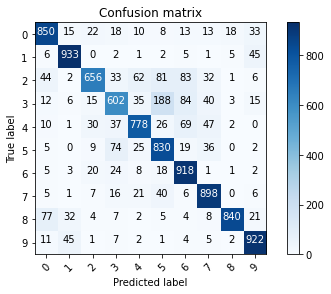

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

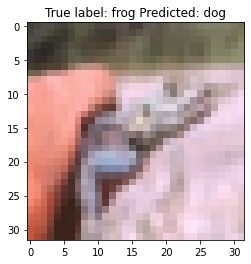

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));